In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [19]:
def fetch_arxiv_papers(query, max_results=1):
    """
    Fetches research papers from arXiv.org based on a query.
    """
    base_url = "http://export.arxiv.org/api/query"
    params = {
        "search_query": f"all:{query}",
        "start": 0,
        "max_results": max_results,
        "sortBy": "relevance",
    }
    
    response = requests.get(base_url, params=params)
    
    if response.status_code != 200:
        print(f"Failed to fetch data: {response.status_code}")
        return []
    
    soup = BeautifulSoup(response.content, "xml")
    papers = []
    
    for entry in soup.find_all("entry"):
        title = entry.title.text.strip()
        summary = entry.summary.text.strip()
        link = entry.id.text.strip()
        authors = [author.find("name").text for author in entry.find_all("author")]
        year = entry.published.text.strip().split("-")[0]
    
        papers.append({
            "Title": title,
            "Summary": summary,
            "Authors": ", ".join(authors),
            "Link": link,
            "Year": year
        })
    
    return papers


In [21]:
def output(query, fn):    
    papers = fn(query)

    # Save to CSV
    df = pd.DataFrame(papers)
    df.to_csv(f"{query.lower().replace(' ', '_')}_papers.csv", index=False)
    print(f"Saved {len(papers)} papers to {query.lower().replace(' ', '_')}_papers.csv")
output("Machine Learning", fetch_arxiv_papers)

Saved 1 papers to machine_learning_papers.csv


In [4]:
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36'
}

list_of_requests = []
url = 'https://www.google.com/search?q=bed+detection+sensory+products&sca_esv=2d3bc29d0d885816&biw=1022&bih=471&tbm=shop&sxsrf=ADLYWIIszWVu_n7SUqCQwP9Om99cwdOPhg%3A1736300653584&ei=bdh9Z9qQI7_G4-EP3KamiQI&ved=0ahUKEwia-7f9_-SKAxU_4zgGHVyTKSEQ4dUDCAg&uact=5&oq=bed+detection+sensory+products&gs_lp=Egtwcm9kdWN0cy1jYyIeYmVkIGRldGVjdGlvbiBzZW5zb3J5IHByb2R1Y3RzSPY2UABY9zVwBHgAkAEAmAFLoAHrDKoBAjMzuAEDyAEA-AEBmAIXoAKFCKgCAcICBxAjGCcY6gLCAgoQABiABBhDGIoFwgIFEAAYgATCAgQQIxgnwgIHEAAYgAQYCsICBxAAGIAEGA3CAgYQABgWGB7CAgsQABjWBRgKGA0YHsICCRAAGNYFGA0YHsICCxAAGAUY1gUYDRgewgILEAAY1gUYCBgNGB7CAgQQIRgKmAMKkgcCMjOgB-RM&sclient=products-cc'

page = requests.get(url, headers=headers)

In [75]:
page.text

'<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN">\n<html>\n<head><meta http-equiv="content-type" content="text/html; charset=utf-8"><meta name="viewport" content="initial-scale=1"><title>https://www.google.com/search?q=bed+detection+sensory+products&amp;sca_esv=2d3bc29d0d885816&amp;biw=1022&amp;bih=471&amp;tbm=shop&amp;sxsrf=ADLYWIIszWVu_n7SUqCQwP9Om99cwdOPhg%3A1736300653584&amp;ei=bdh9Z9qQI7_G4-EP3KamiQI&amp;ved=0ahUKEwia-7f9_-SKAxU_4zgGHVyTKSEQ4dUDCAg&amp;uact=5&amp;oq=bed+detection+sensory+products&amp;gs_lp=Egtwcm9kdWN0cy1jYyIeYmVkIGRldGVjdGlvbiBzZW5zb3J5IHByb2R1Y3RzSPY2UABY9zVwBHgAkAEAmAFLoAHrDKoBAjMzuAEDyAEA-AEBmAIXoAKFCKgCAcICBxAjGCcY6gLCAgoQABiABBhDGIoFwgIFEAAYgATCAgQQIxgnwgIHEAAYgAQYCsICBxAAGIAEGA3CAgYQABgWGB7CAgsQABjWBRgKGA0YHsICCRAAGNYFGA0YHsICCxAAGAUY1gUYDRgewgILEAAY1gUYCBgNGB7CAgQQIRgKmAMKkgcCMjOgB-RM&amp;sclient=products-cc</title></head>\n<body style="font-family: arial, sans-serif; background-color: #fff; color: #000; padding:20px; font-size:18px; overscr

In [72]:
product_soup = BeautifulSoup(page.text, 'html.parser')
# find all <a> where there exists child <h3>
product_names = []
product_links = []
print(f'a_tag: {product_soup.find_all("a")}')
for a_tag in product_soup.find_all('a'):
    h3_tag = a_tag.find('h3')
    if h3_tag:
        product_name = h3_tag.text
        product_link = a_tag['href']
        print(f'Product Name: {product_name}')
        print(f'Product Link: {product_link}')
        product_names.append(product_name)
        product_links.append(product_link)
product_df = pd.DataFrame({
    'Product Name': product_names,
    'Product Link': product_links
})
product_df.to_csv(f"products.csv", index=False)
print(f"Saved to products.csv")

a_tag: [<a href="#" onclick="document.getElementById('infoDiv').style.display='block';">Why did this happen?</a>, <a href="//www.google.com/policies/terms/">Terms of Service</a>, <a href="//support.google.com/websearch/answer/86640">Learn more</a>]
Saved to products.csv


'<!doctype html><html itemscope="" itemtype="http://schema.org/Product" lang="en-SG"> <style>.vqqGxe a,.vqqGxe a:active,.vqqGxe a:hover,.vqqGxe a:link,.vqqGxe a:visited{color:#0b57d0;text-decoration:underline}.vqqGxe#vqqGxe{margin:0 38px;max-width:1024px}.LZ18Oc{display:flex;max-width:100%;border-bottom:solid 1px #ebebeb;margin-bottom:24px;padding:16px 20px 16px 38px}.LZ18Oc .sl2Sj{margin-right:38px;min-width:max-content;flex-shrink:0;color:#80868b;display:block;font-size:15px;font-weight:500;line-height:20px;padding-top:14px}.LZ18Oc .QnoD0e{flex:1 0 auto;width:0}.gb_x{display:-webkit-box;display:-webkit-flex;display:-webkit-box;display:-webkit-flex;display:flex;-webkit-box-pack:end;-webkit-justify-content:flex-end;-webkit-justify-content:flex-end;justify-content:flex-end;width:100%}.gb_y{-webkit-box-sizing:border-box;box-sizing:border-box;height:48px;padding:4px}.gb_z,.gb_A,.gb_B{-webkit-tap-highlight-color:transparent;-webkit-box-sizing:border-box;box-sizing:border-box;float:right;ou
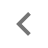
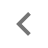
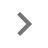
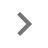
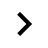
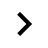

In [5]:
lunderg_url = 'https://www.google.com/shopping/product/16701646655224915668/reviews?q=fall+detection+products&prds=eto:434599264958095634_0,pid:1702362744076538404,rsk:PC_10997157484558716451&sa=X&ved=0ahUKEwjT1I-evOWKAxWgxDgGHRRxH5wQqSQIOw'
lunderg_reviews = requests.get(lunderg_url, headers=headers)
lunderg_reviews.text

In [6]:
lunderg_soup = BeautifulSoup(lunderg_reviews.text, 'html.parser')
#get all the reviews, which are divs with class name
reviews = lunderg_soup.find_all('div', class_='z6XoBf fade-in-animate')
review_texts = []
review_ratings = []
for review in reviews:
    review_rating = review.find('div', class_='UzThIf').attrs['aria-label']
    review_text = review.find('div', class_='g1lvWe').text
    print(f'Review: {review_text}')
    print(f'Rating: {review_rating}')
    review_texts.append(review_text)
    review_ratings.append(review_rating)

review_df = pd.DataFrame({
    'Review': review_texts,
    'Rating': review_ratings
})
review_df.to_csv(f"reviews.csv", index=False)
print(f"Saved to reviews.csv")


Review: This bed alarm system is a Godsend for anyone taking care of an elderly friend or relative. Caring for someone in need can be very stressful. You never know what the next day, let alone next hour, might bring in those situations. As a primary caregiver, being able to relax while the one you are attending is resting safely is invaluable. This alarm system lets you know before they get up and leave bed. By alerting the caregiver of their movement before leaving bed it dramatically decreases the patients chance of injuring themselves by wandering unsupervised.The bed pad is 33” long and 10” wide. It is placed across the width of the mattress. It includes rubber bands and clips to help keep it in place on the mattress top. This system sets up and is running in ... MoreThis bed alarm system is a Godsend for anyone taking care of an elderly friend or relative. Caring for someone in need can be very stressful. You never know what the next day, let alone next hour, might bring in those